# 🚦 Accident Hotspot Analysis using Machine Learning
This project identifies accident hotspots using clustering algorithms like **KMeans** and **DBSCAN**. It also visualizes the hotspots on an interactive map using Folium.

In [3]:
pip install folium


   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
   -------------------------------------- 113.4/113.4 kB 287.3 kB/s eta 0:00:00


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')


In [7]:

# Load dataset
df = pd.read_csv('sample_accident_data.csv')  # Replace with your file name
df.head()


,Accident_ID,Latitude,Longitude,Severity,Vehicles_Involved,Casualties,Date
0,1,12.874540,77.813625,Low,3,2,2023-01-01
1,2,13.450714,77.367312,Medium,1,2,2023-01-02
2,3,13.231994,77.429303,Low,2,1,2023-01-03
3,4,13.098658,78.018843,Low,3,2,2023-01-04
4,5,12.656019,77.785143,Medium,1,2,2023-01-05


In [9]:

# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing lat/long
df = df.dropna(subset=['Latitude', 'Longitude'])
df = df[(df['Latitude'] >= -90) & (df['Latitude'] <= 90) &
        (df['Longitude'] >= -180) & (df['Longitude'] <= 180)]

print(f"Dataset after cleaning: {df.shape}")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident_ID        200 non-null    int64  
 1   Latitude           200 non-null    float64
 2   Longitude          200 non-null    float64
 3   Severity           200 non-null    object 
 4   Vehicles_Involved  200 non-null    int64  
 5   Casualties         200 non-null    int64  
 6   Date               200 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB
None
       Accident_ID    Latitude   Longitude  Vehicles_Involved  Casualties
count   200.000000  200.000000  200.000000         200.000000  200.000000
mean    100.500000   12.984006   77.703500           2.395000    1.030000
std      57.879185    0.294891    0.234401           1.069906    0.813887
min       1.000000   12.505522   77.304049           1.000000    0.000000
25%      50.750000   12.72

,Accident_ID,Latitude,Longitude,Severity,Vehicles_Involved,Casualties,Date
0,1,12.874540,77.813625,Low,3,2,2023-01-01
1,2,13.450714,77.367312,Medium,1,2,2023-01-02
2,3,13.231994,77.429303,Low,2,1,2023-01-03
3,4,13.098658,78.018843,Low,3,2,2023-01-04
4,5,12.656019,77.785143,Medium,1,2,2023-01-05


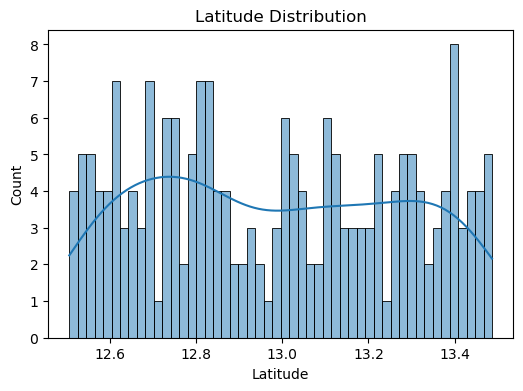

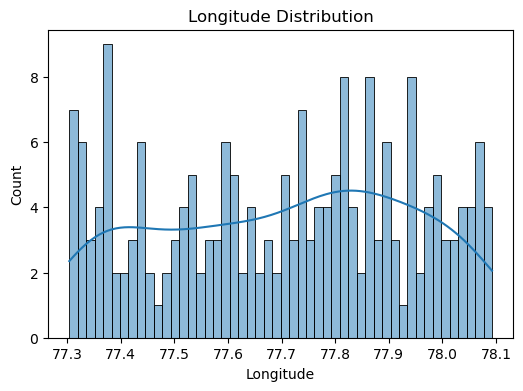

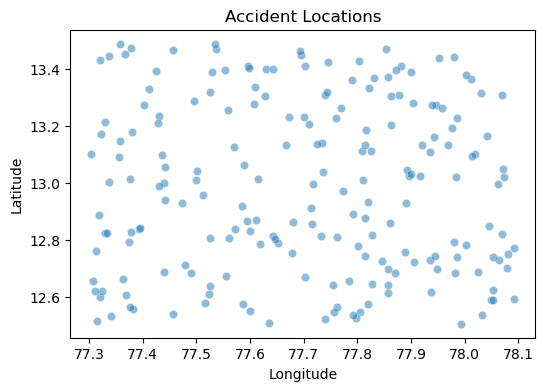

In [11]:

plt.figure(figsize=(6,4))
sns.histplot(df['Latitude'], bins=50, kde=True)
plt.title('Latitude Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Longitude'], bins=50, kde=True)
plt.title('Longitude Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.5)
plt.title('Accident Locations')
plt.show()


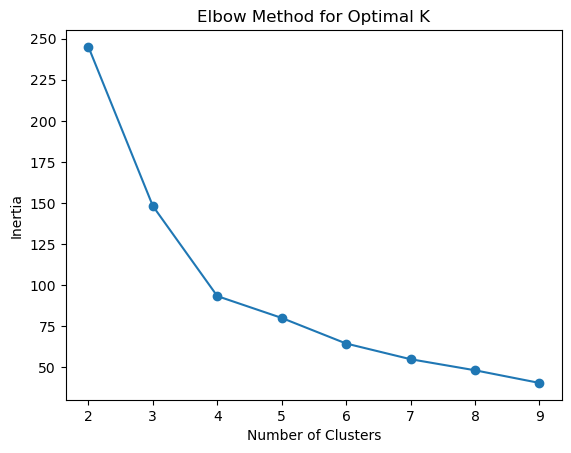

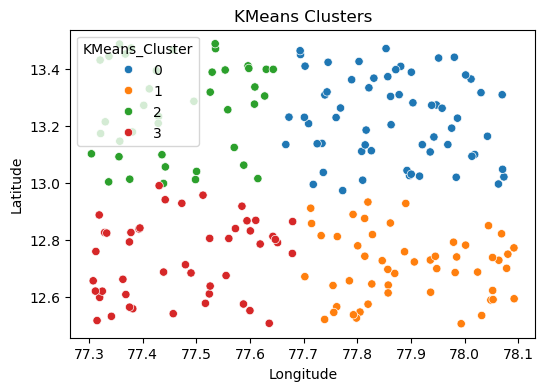

In [13]:

X = df[['Latitude', 'Longitude']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Elbow method to choose k
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit final KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['KMeans_Cluster'], palette='tab10')
plt.title('KMeans Clusters')
plt.show()


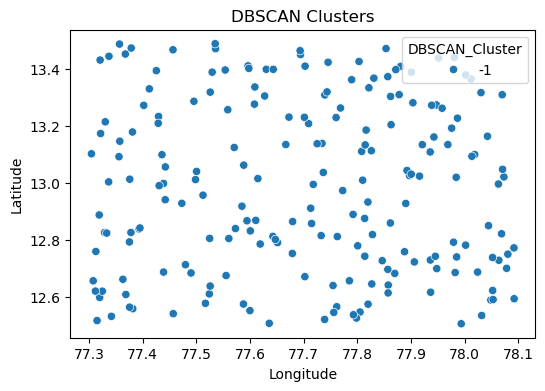

In [15]:

dbscan = DBSCAN(eps=0.2, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clusters')
plt.show()


In [17]:

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

HeatMap(data=df[['Latitude','Longitude']], radius=15).add_to(m)

m.save('accident_hotspots_map.html')
m


### ✅ Summary
- Performed **data cleaning and EDA**.
- Applied **KMeans and DBSCAN** clustering.
- Visualized accident hotspots on an **interactive Folium map** (`accident_hotspots_map.html`).
- You can adjust `n_clusters`, `eps`, and `min_samples` for better results.